In [4]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.express as px
import sklearn 
from pandas import Series, DataFrame 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import linear_model 
import statsmodels.formula.api as smf
import statsmodels.api as sm     
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings 
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('churn_clean.csv',dtype={'locationid':np.int64}) 

df.head(5)

CaseOrder Customer_id                           Interaction  \
0          1     K409198  aa90260b-4141-4a24-8e36-b04ce1f4f77b   
1          2     S120509  fb76459f-c047-4a9d-8af9-e0f7d4ac2524   
2          3     K191035  344d114c-3736-4be5-98f7-c72c281e2d35   
3          4      D90850  abfa2b40-2d43-4994-b15a-989b8c79e311   
4          5     K662701  68a861fd-0d20-4e51-a587-8a90407ee574   

                                UID         City State                 County  \
0  e885b299883d4f9fb18e39c75155d990  Point Baker    AK  Prince of Wales-Hyder   
1  f2de8bef964785f41a2959829830fb8a  West Branch    MI                 Ogemaw   
2  f1784cfa9f6d92ae816197eb175d3c71      Yamhill    OR                Yamhill   
3  dc8a365077241bb5cd5ccd305136b05e      Del Mar    CA              San Diego   
4  aabb64a116e83fdc4befc1fbab1663f9    Needville    TX              Fort Bend   

     Zip       Lat        Lng  ...  MonthlyCharge Bandwidth_GB_Year Item1  \
0  99927  56.25100 -133.37571  ...     172.455519        904.536110     5   
1  48661  44.32893  -84.24080  ...     242.632554        800.982766     3   
2  97148  45.35589 -123.24657  ...     159.947583       2054.706961     4   
3  92014  32.96687 -117.24798  ...     119.956840       2164.579412     4   
4  77461  29.38012  -95.80673  ...     149.948316        271.493436     4   

  Item2  Item3  Item4  Item5 Item6 Item7 Item8  
0     5      5      3      4     4     3     4  
1     4      3      3      4     3     4     4  
2     4      2      4      4     3     3     3  
3     4      4      2      5     4     3     3  
4     4      4      3      4     4     4     5  

[5 rows x 50 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

### Data Cleaning

In [7]:
print(df.duplicated().value_counts())

False    10000
dtype: int64


In [8]:
df.isnull().sum()

CaseOrder               0
Customer_id             0
Interaction             0
UID                     0
City                    0
State                   0
County                  0
Zip                     0
Lat                     0
Lng                     0
Population              0
Area                    0
TimeZone                0
Job                     0
Children                0
Age                     0
Income                  0
Marital                 0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
PaperlessBilling        0
PaymentMetho

In [9]:
CheckOutliers = ['Children', 'Age', 'Income', 'Outage_sec_perweek','Email', 'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year']
CheckOutliers

['Children',
 'Age',
 'Income',
 'Outage_sec_perweek',
 'Email',
 'Contacts',
 'Yearly_equip_failure',
 'Tenure',
 'MonthlyCharge',
 'Bandwidth_GB_Year']

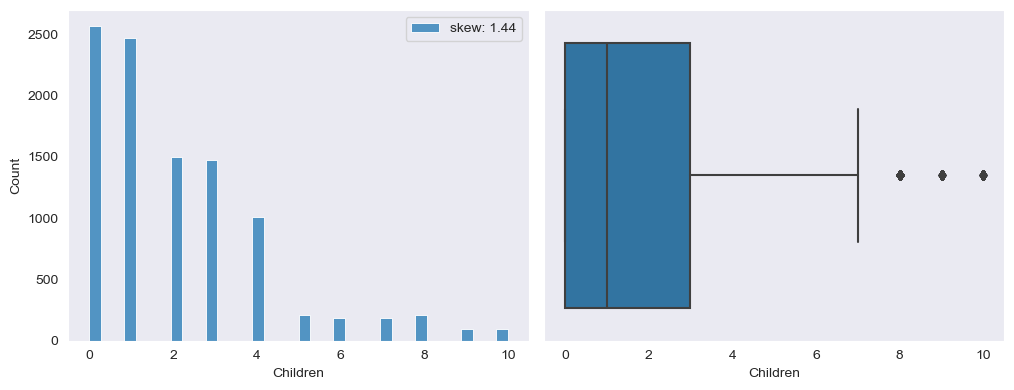

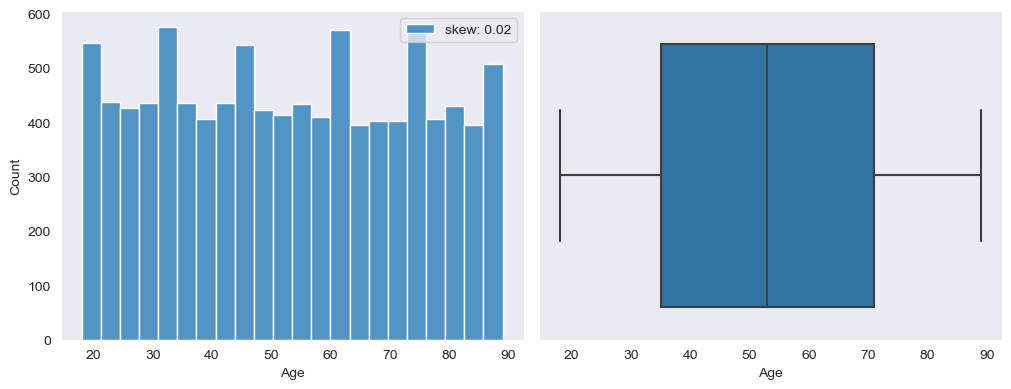

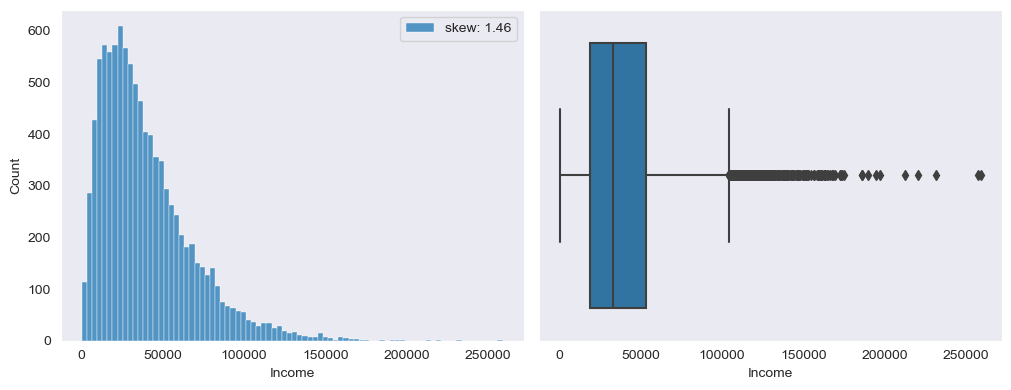

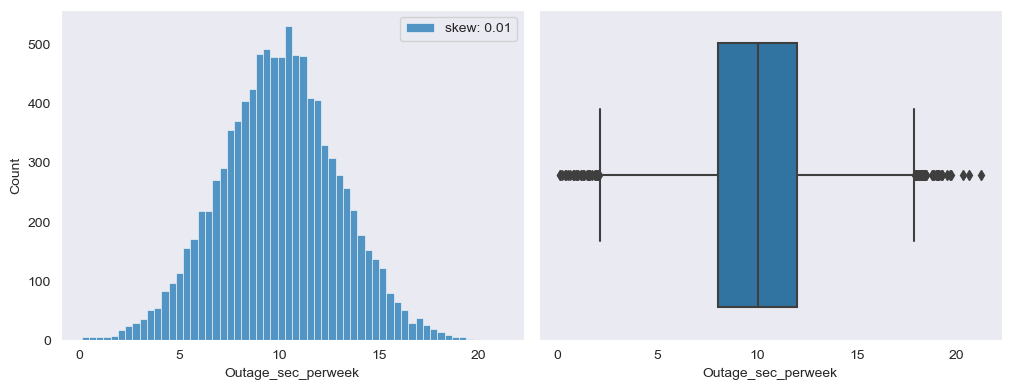

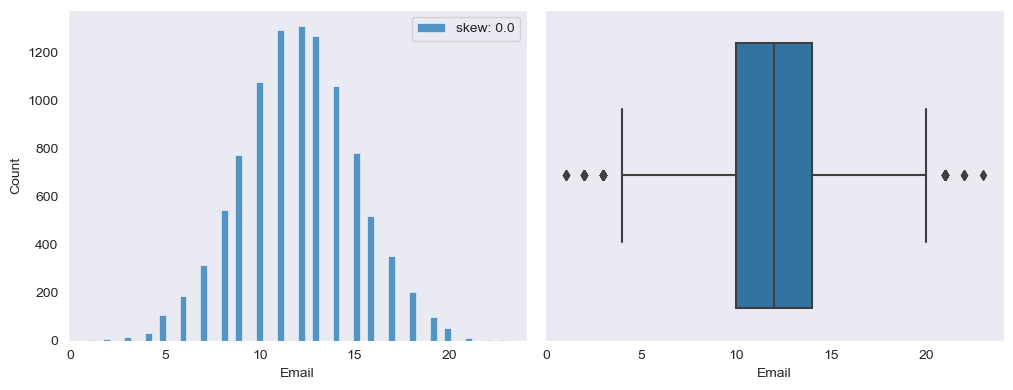

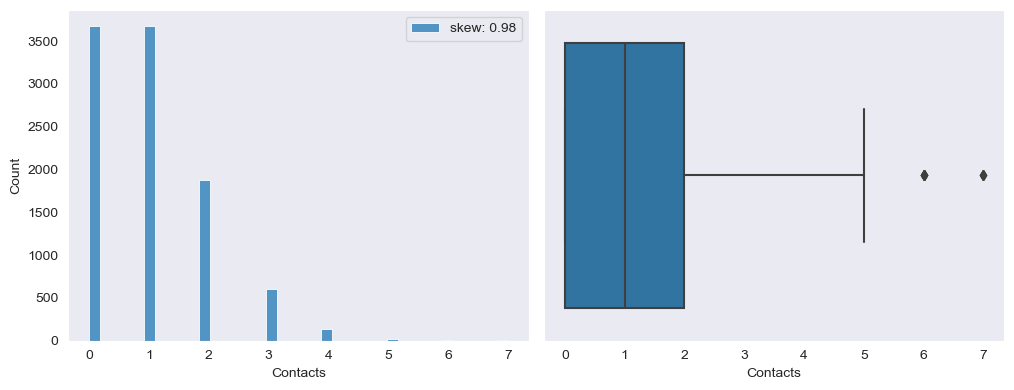

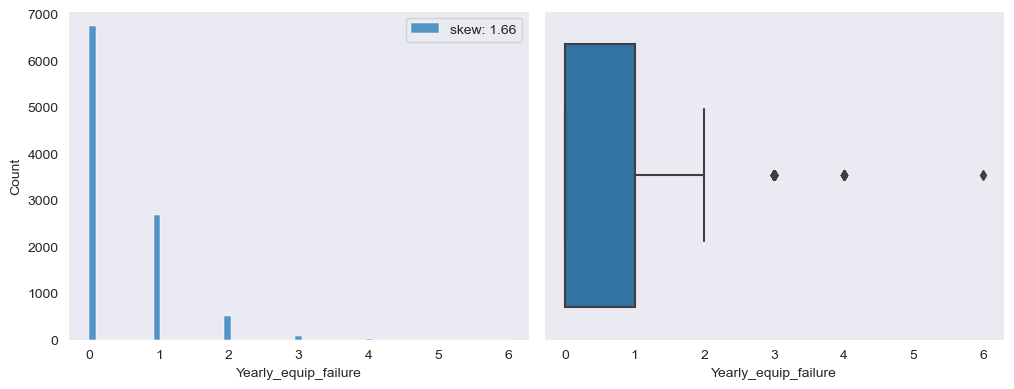

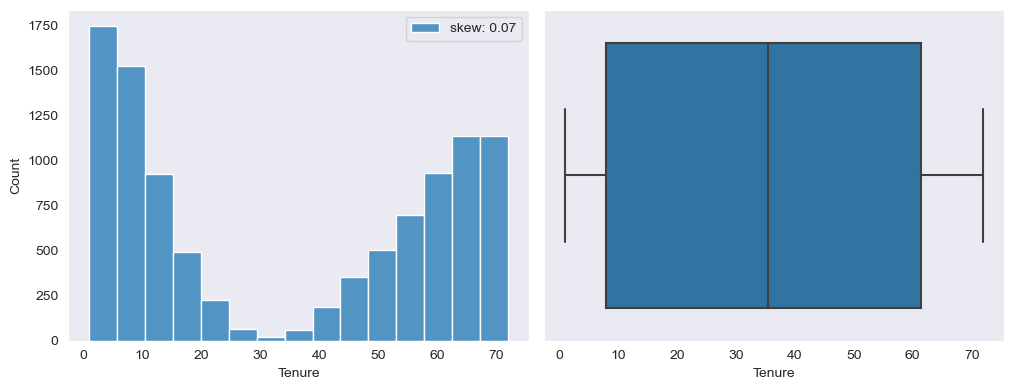

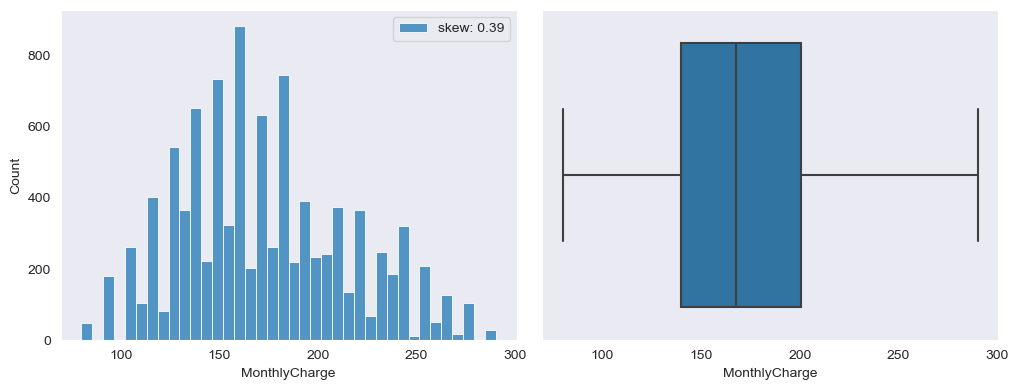

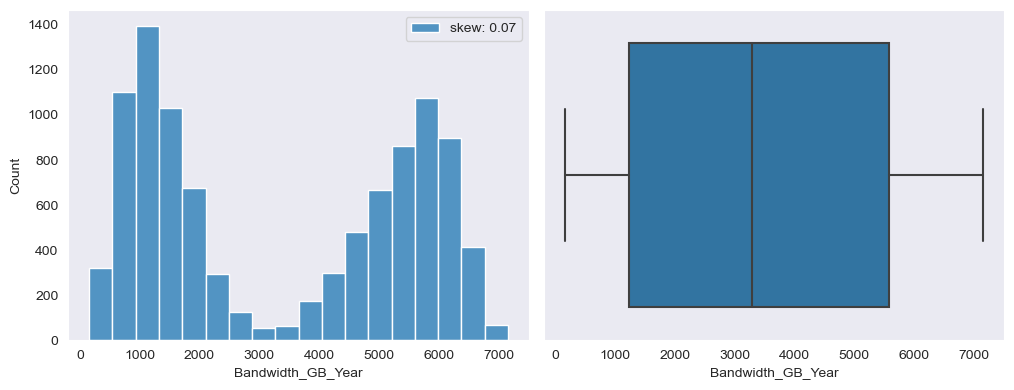

In [10]:
sns.set_style('dark')
for col in CheckOutliers:
    plt.figure(figsize=(15,4))
    plt.subplot(131)
    sns.histplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))
    plt.legend()
    plt.subplot(132)
    sns.boxplot(df[col])
    plt.tight_layout()
    plt.show()

In [11]:
outliers_new = ['Children', 'Income', 'Outage_sec_perweek','Email', 'Contacts', 'Yearly_equip_failure']
outliers_new 

['Children',
 'Income',
 'Outage_sec_perweek',
 'Email',
 'Contacts',
 'Yearly_equip_failure']

In [12]:
df_cop = df.copy()

In [13]:
def iqr_capping(df, cols, factor):
    
    for col in cols:
        
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        
        iqr = q3 - q1
        
        upper_whisker = q3 + (factor*iqr)
        lower_whisker = q1 - (factor*iqr)
        
        df[col] = np.where(df[col]>upper_whisker, upper_whisker,
                  np.where(df[col]<lower_whisker, lower_whisker, df[col]))

In [14]:
iqr_capping(df_cop, outliers_new, 1.5)

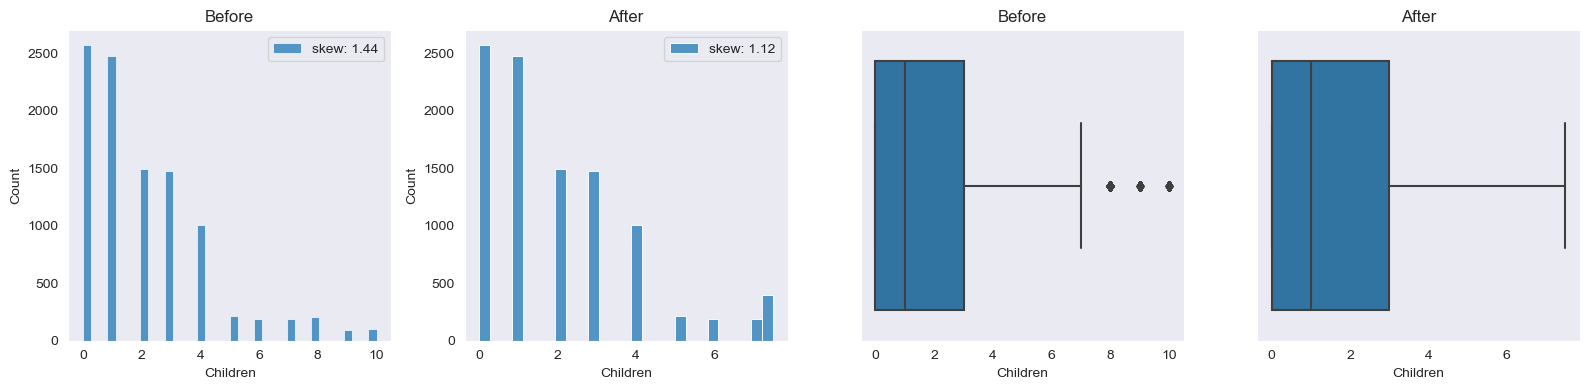

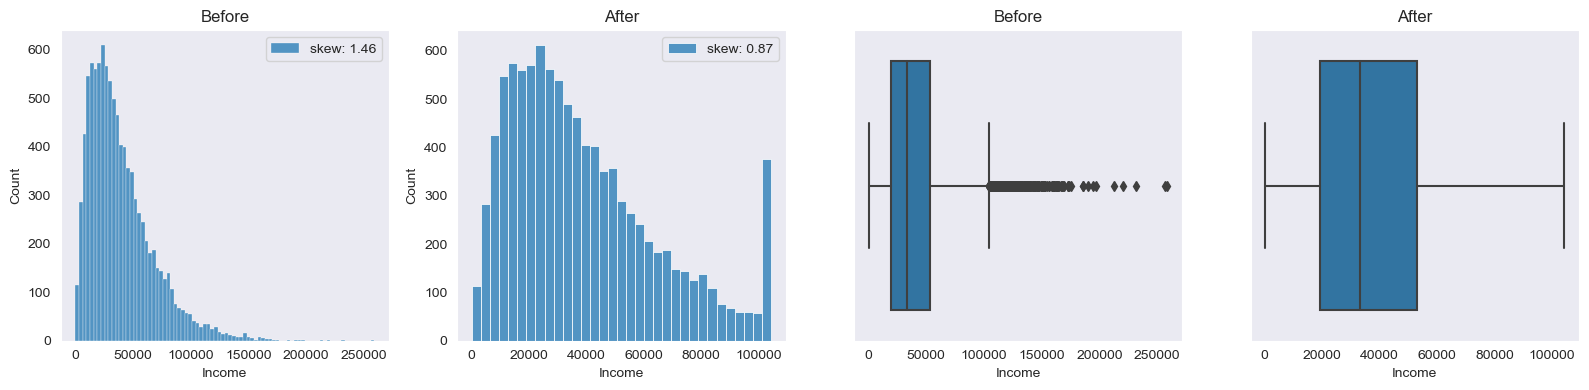

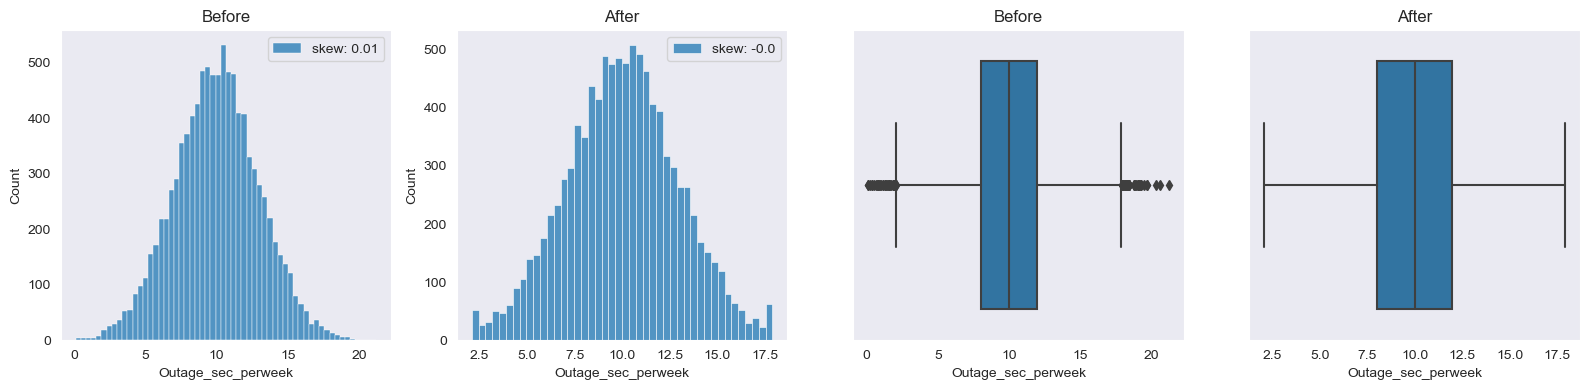

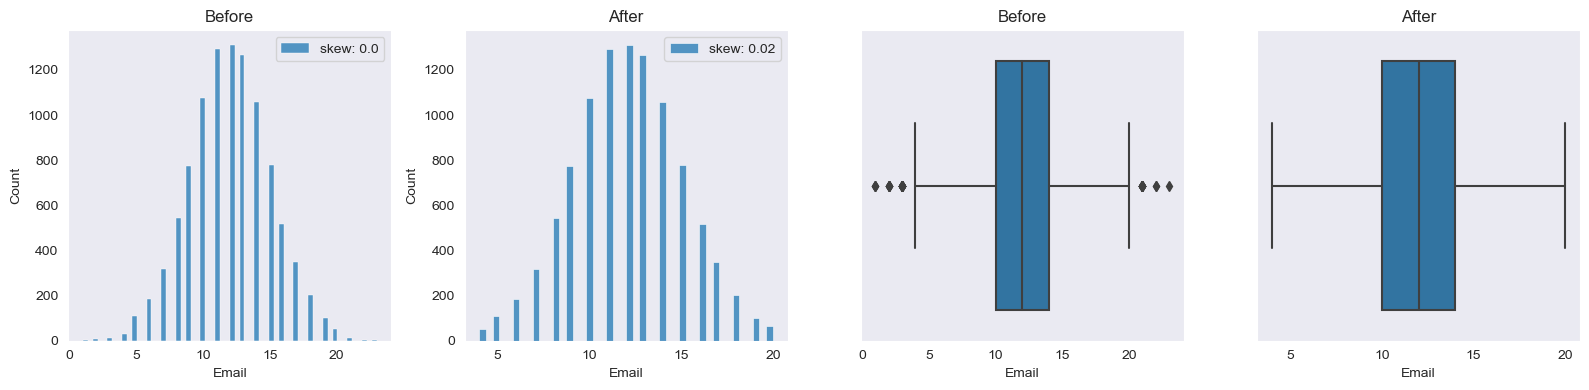

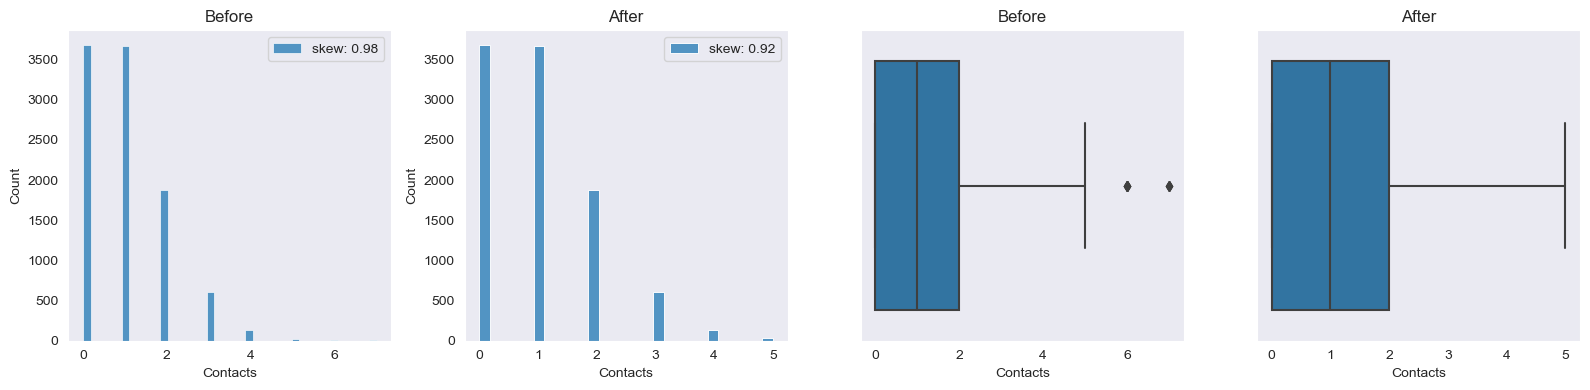

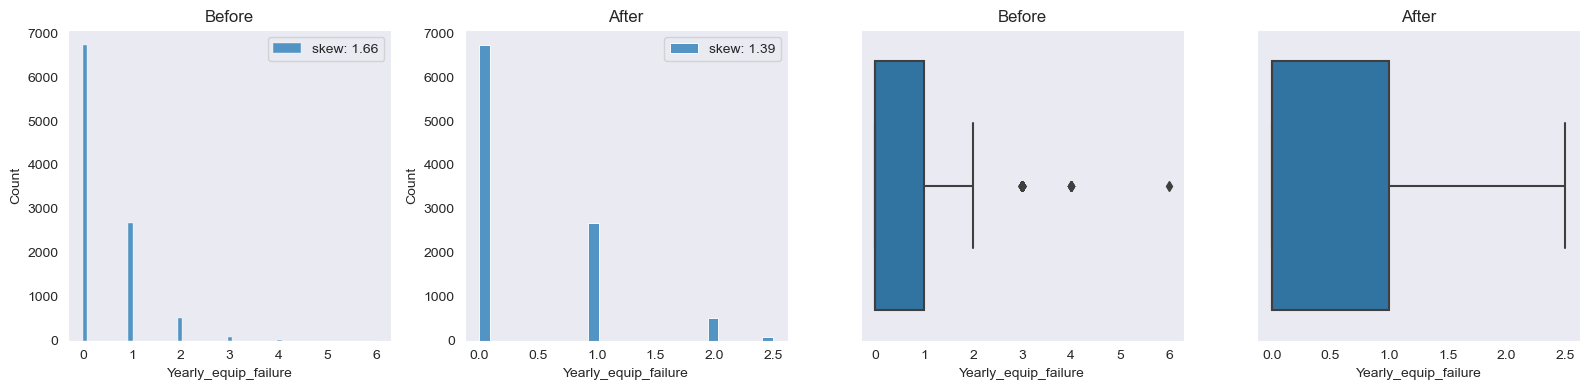

In [15]:
for col in outliers_new:
    plt.figure(figsize=(16,4))
    
    plt.subplot(141)
    sns.histplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))
    plt.title('Before')
    plt.legend()
    
    plt.subplot(142)
    sns.histplot(df_cop[col], label="skew: " + str(np.round(df_cop[col].skew(),2)))
    plt.title('After')
    plt.legend()
    
    plt.subplot(143)
    sns.boxplot(df[col])
    plt.title('Before')
    
    plt.subplot(144)
    sns.boxplot(df_cop[col])
    plt.title('After')
    plt.tight_layout()
    plt.show()

### Data Exploration - Univariate

In [16]:
df[['Children', 'Age', 'Income', 'Outage_sec_perweek','Email', 'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year']].describe()

Children           Age         Income  Outage_sec_perweek  \
count  10000.0000  10000.000000   10000.000000        10000.000000   
mean       2.0877     53.078400   39806.926771           10.001848   
std        2.1472     20.698882   28199.916702            2.976019   
min        0.0000     18.000000     348.670000            0.099747   
25%        0.0000     35.000000   19224.717500            8.018214   
50%        1.0000     53.000000   33170.605000           10.018560   
75%        3.0000     71.000000   53246.170000           11.969485   
max       10.0000     89.000000  258900.700000           21.207230   

              Email      Contacts  Yearly_equip_failure        Tenure  \
count  10000.000000  10000.000000          10000.000000  10000.000000   
mean      12.016000      0.994200              0.398000     34.526188   
std        3.025898      0.988466              0.635953     26.443063   
min        1.000000      0.000000              0.000000      1.000259   
25%       10.000000      0.000000              0.000000      7.917694   
50%       12.000000      1.000000              0.000000     35.430507   
75%       14.000000      2.000000              1.000000     61.479795   
max       23.000000      7.000000              6.000000     71.999280   

       MonthlyCharge  Bandwidth_GB_Year  
count   10000.000000       10000.000000  
mean      172.624816        3392.341550  
std        42.943094        2185.294852  
min        79.978860         155.506715  
25%       139.979239        1236.470827  
50%       167.484700        3279.536903  
75%       200.734725        5586.141370  
max       290.160419        7158.981530

In [17]:
df[['Techie', 'Churn', 'StreamingMovies', 'StreamingTV', 'TechSupport', 'OnlineBackup', 'OnlineSecurity', 'Port_modem', 'Multiple', 'DeviceProtection']].value_counts()

Techie  Churn  StreamingMovies  StreamingTV  TechSupport  OnlineBackup  OnlineSecurity  Port_modem  Multiple  DeviceProtection
No      No     No               No           No           No            No              Yes         No        No                  80
                                                                                        No          No        No                  72
                                Yes          No           No            No              Yes         No        No                  69
                                                                                        No          Yes       No                  67
                                No           No           Yes           No              Yes         No        No                  66
                                                                                                                                  ..
Yes     No     Yes              No           Yes          Yes           No 

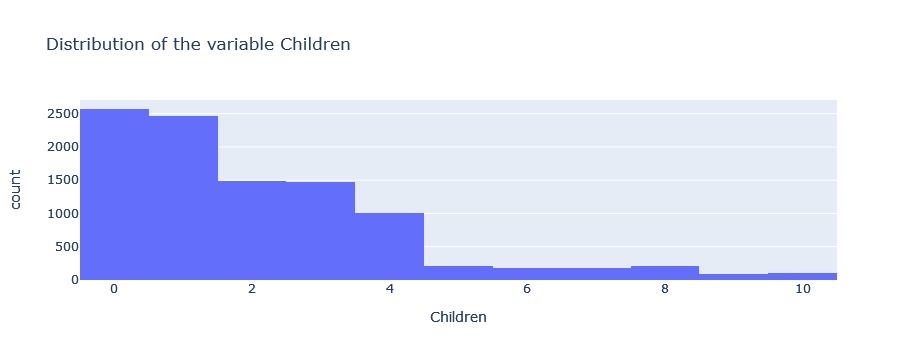

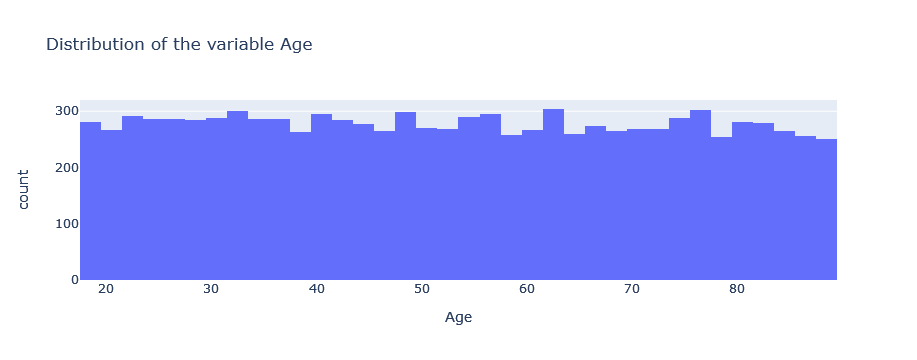

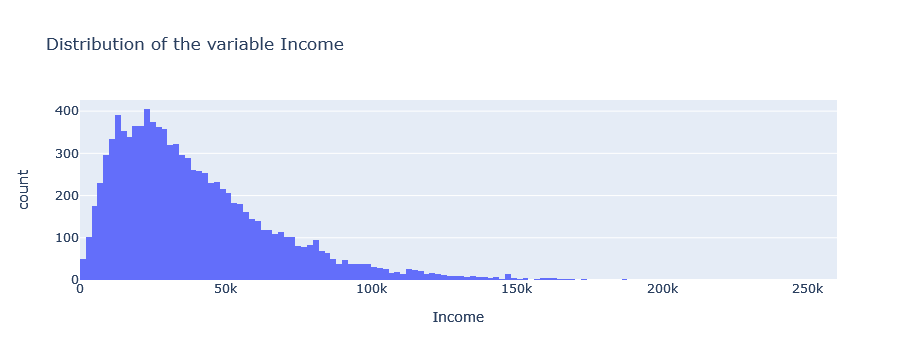

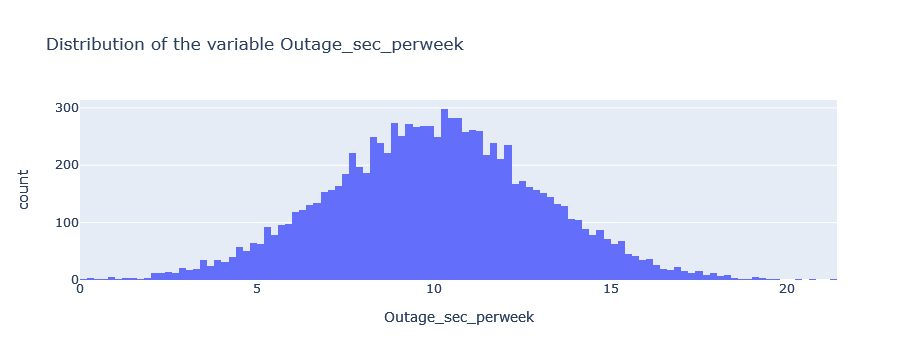

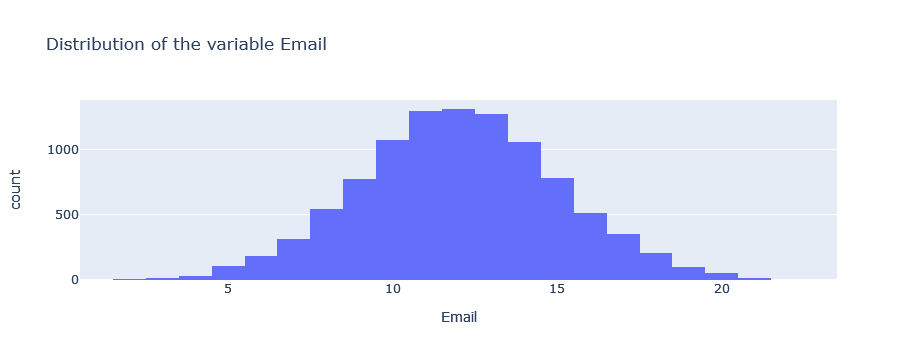

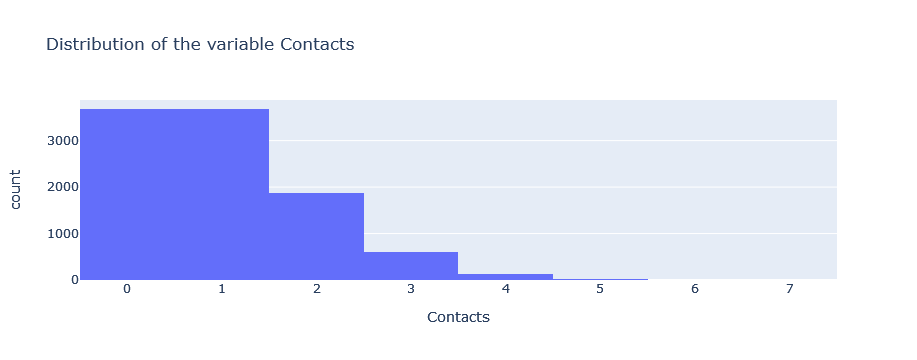

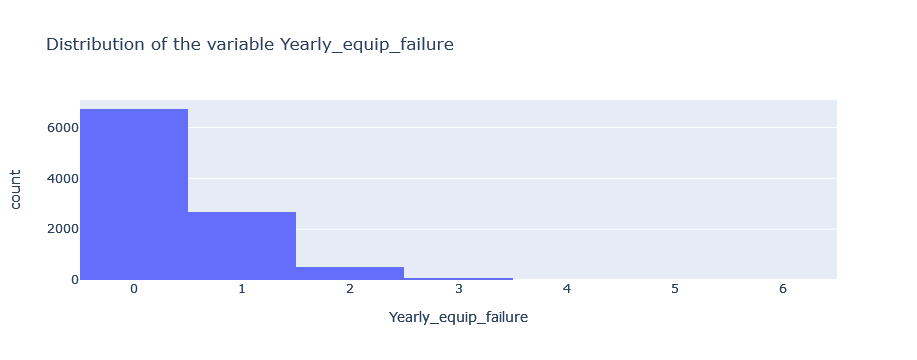

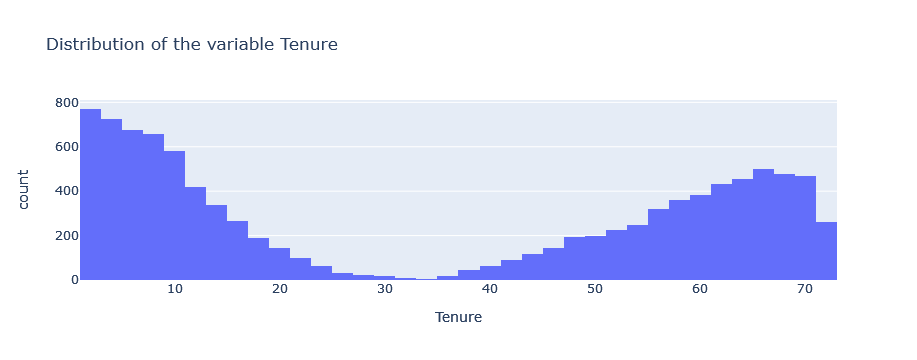

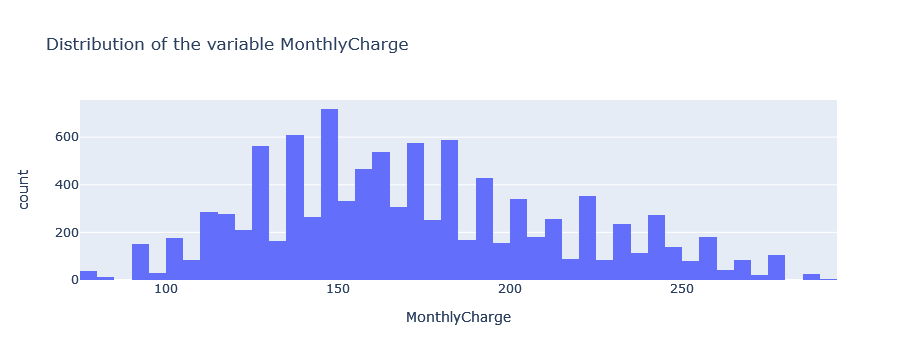

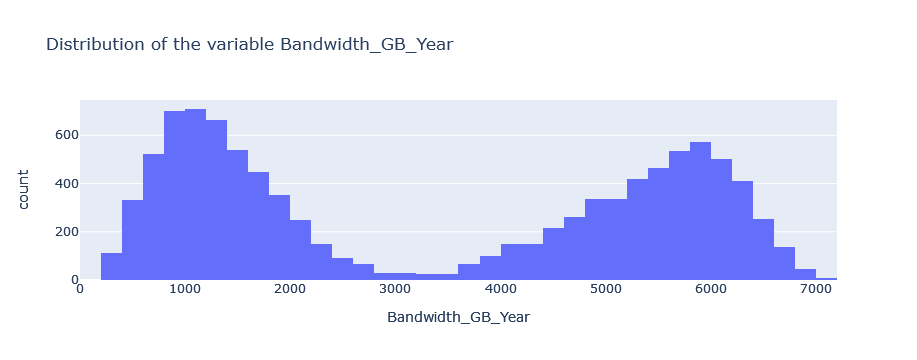

In [18]:
for i in CheckOutliers:
    fig = px.histogram(df, x=i, title=f"Distribution of the variable {i}")
    fig.update_layout( xaxis={'categoryorder':'total descending'})
    fig.show()

In [19]:
categorical= ['Techie', 'Churn', 'StreamingMovies', 'StreamingTV', 'TechSupport', 'OnlineBackup', 'OnlineSecurity', 'Port_modem', 'Multiple', 'DeviceProtection']
categorical

['Techie',
 'Churn',
 'StreamingMovies',
 'StreamingTV',
 'TechSupport',
 'OnlineBackup',
 'OnlineSecurity',
 'Port_modem',
 'Multiple',
 'DeviceProtection']

In [20]:
df_categorical= df[['Techie', 'StreamingMovies', 'StreamingTV', 'TechSupport', 'OnlineBackup', 'OnlineSecurity', 'Port_modem', 'Multiple', 'DeviceProtection']]

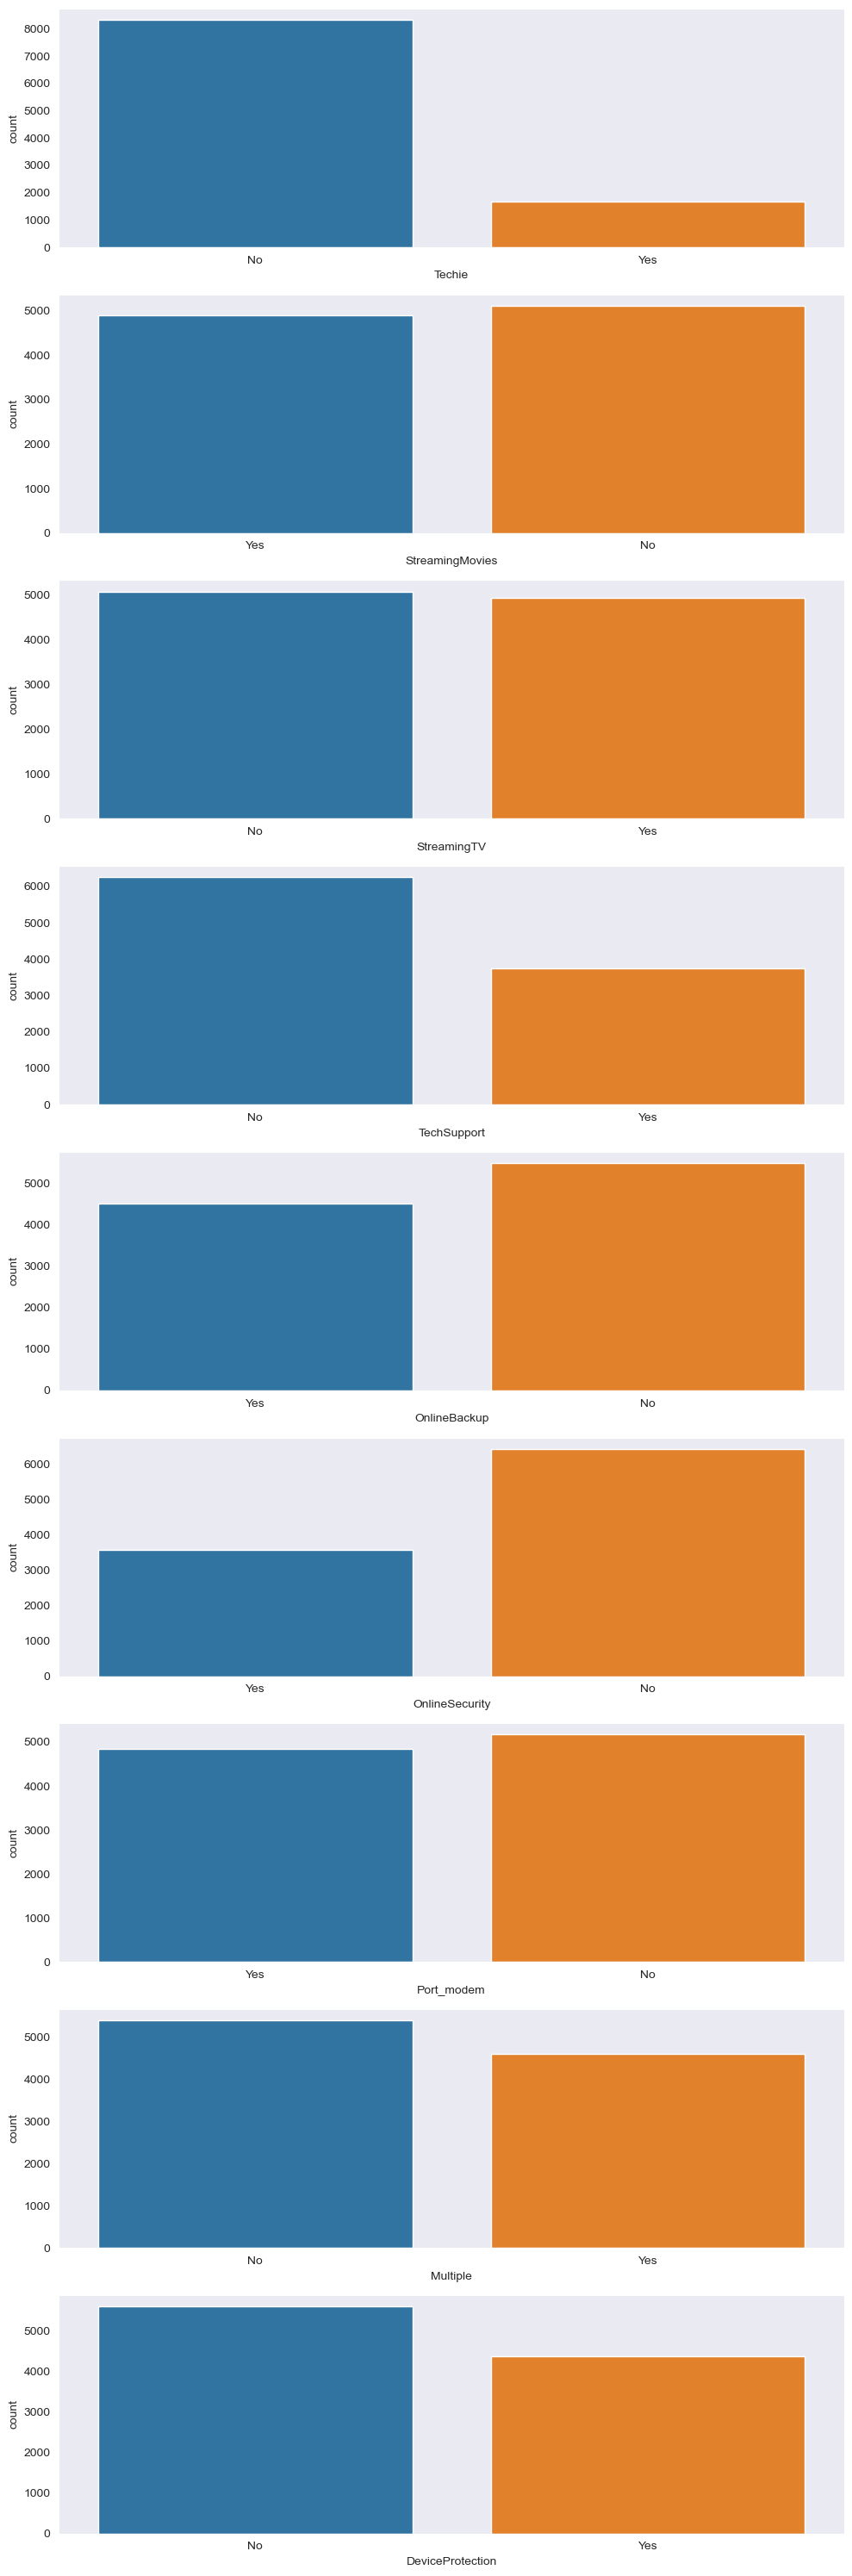

In [21]:
fig , ax = plt.subplots(9,figsize = (10,30))  
for i , subplots in zip (df_categorical, ax.flatten()):  
  sns.countplot(df_categorical[i],ax = subplots)
plt.tight_layout()
plt.show()

### Data Exploration - Bivariate

In [22]:
df.groupby(by='Churn').agg('mean')[['Children', 'Age', 'Income', 'Outage_sec_perweek','Email', 'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year']]

Children        Age        Income  Outage_sec_perweek      Email  \
Churn                                                                     
No     2.093197  53.008435  39706.395664           10.002128  11.993605   
Yes    2.072453  53.272453  40085.758332           10.001073  12.078113   

       Contacts  Yearly_equip_failure     Tenure  MonthlyCharge  \
Churn                                                             
No     0.989116              0.404082  42.234090     163.008973   
Yes    1.008302              0.381132  13.147667     199.295175   

       Bandwidth_GB_Year  
Churn                     
No           3971.855917  
Yes          1785.009247

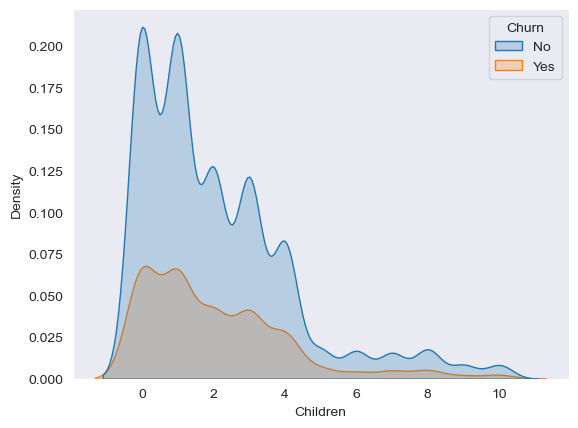

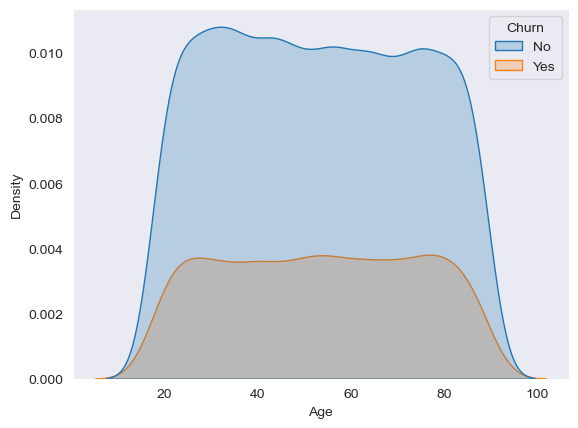

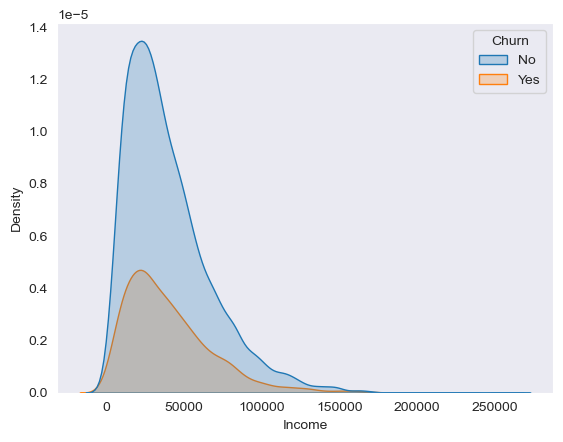

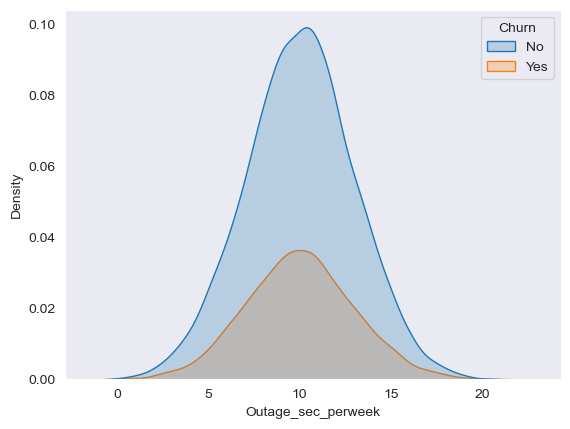

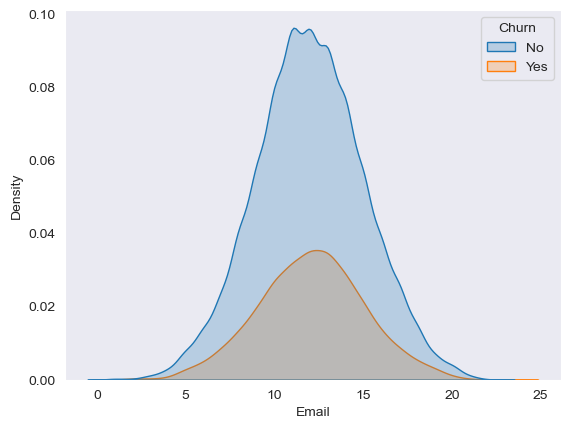

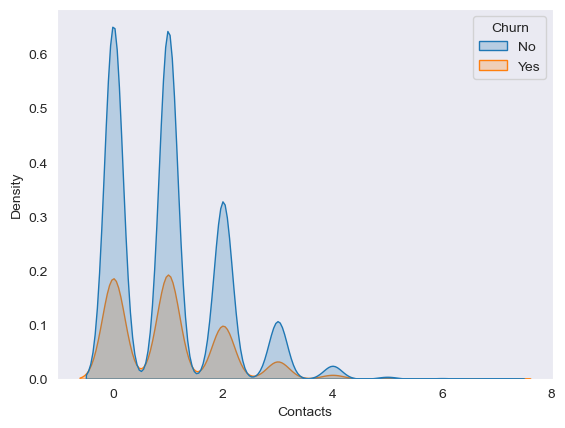

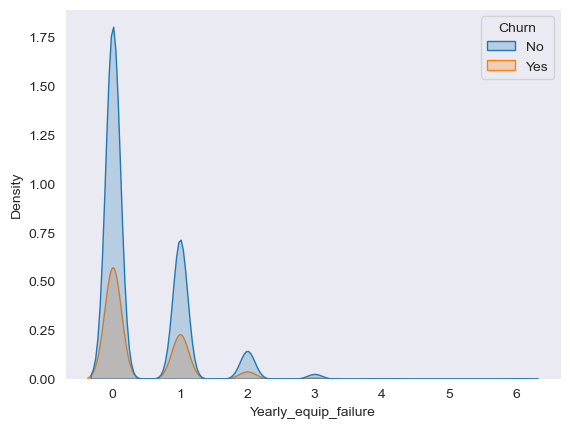

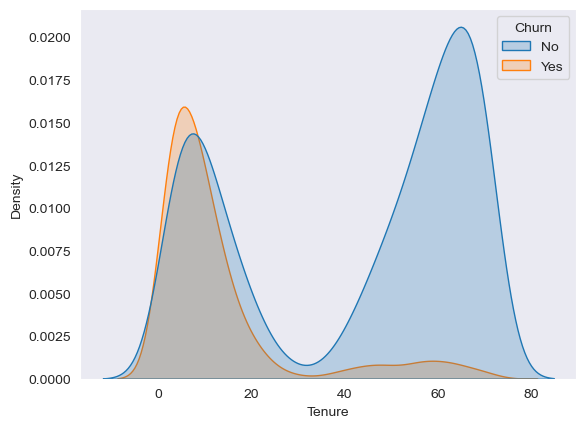

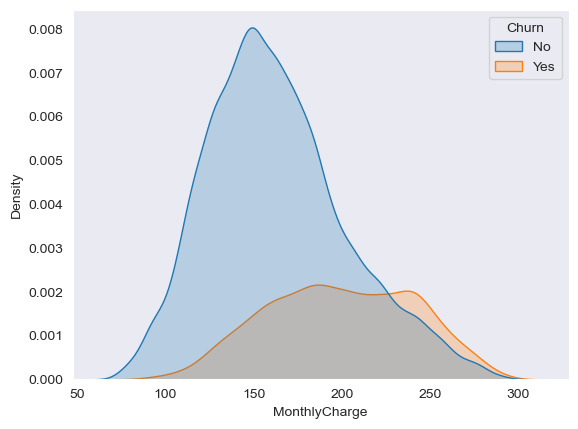

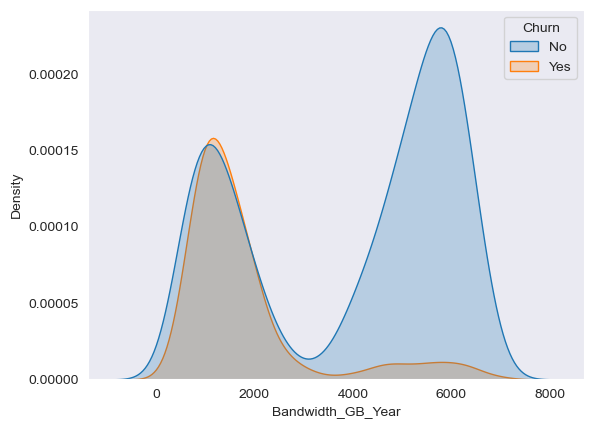

In [23]:
for i in CheckOutliers:
    sns.kdeplot(data=df, x=i, hue='Churn', fill=True)
    plt.show()

In [24]:
pd.crosstab([df.Techie, df.StreamingMovies, df.StreamingTV, df.TechSupport, df.OnlineBackup, df.OnlineSecurity, df.Port_modem, df.Multiple, df.DeviceProtection], df.Churn, margins=True)

Churn                                                                                                              No  \
Techie StreamingMovies StreamingTV TechSupport OnlineBackup OnlineSecurity Port_modem Multiple DeviceProtection         
No     No              No          No          No           No             No         No       No                  72   
                                                                                               Yes                 60   
                                                                                      Yes      No                  57   
                                                                                               Yes                 35   
                                                                           Yes        No       No                  80   
...                                                                                                               ...   
Yes    Yes             Yes         Yes         Yes          Yes            No         Yes      Yes                  0   
                                                                           Yes        No       Yes                  1   
                                                                                      Yes      No                   0   
                                                                                               Yes                  0   
All                                                                                                              7350   

Churn                                                                                                             Yes  \
Techie StreamingMovies StreamingTV TechSupport OnlineBackup OnlineSecurity Port_modem Multiple DeviceProtection         
No     No              No          No          No           No             No         No       No                   2   
                                                                                               Yes                  2   
                                                                                      Yes      No                   4   
                                                                                               Yes                  7   
                                                                           Yes        No       No                   1   
...                                                                                                               ...   
Yes    Yes             Yes         Yes         Yes          Yes            No         Yes      Yes                  1   
                                                                           Yes        No       Yes                  3   
                                                                                      Yes      No                   4   
                                                                                               Yes                  1   
All                                                                                                              2650   

Churn                                                                                                              All  
Techie StreamingMovies StreamingTV TechSupport OnlineBackup OnlineSecurity Port_modem Multiple DeviceProtection         
No     No              No          No          No           No             No         No       No                   74  
                                                                                               Yes                  62  
                                                                                      Yes      No                   61  
                                                                                               Yes                  42  
                                                                           Yes        No       No                   81  
...  

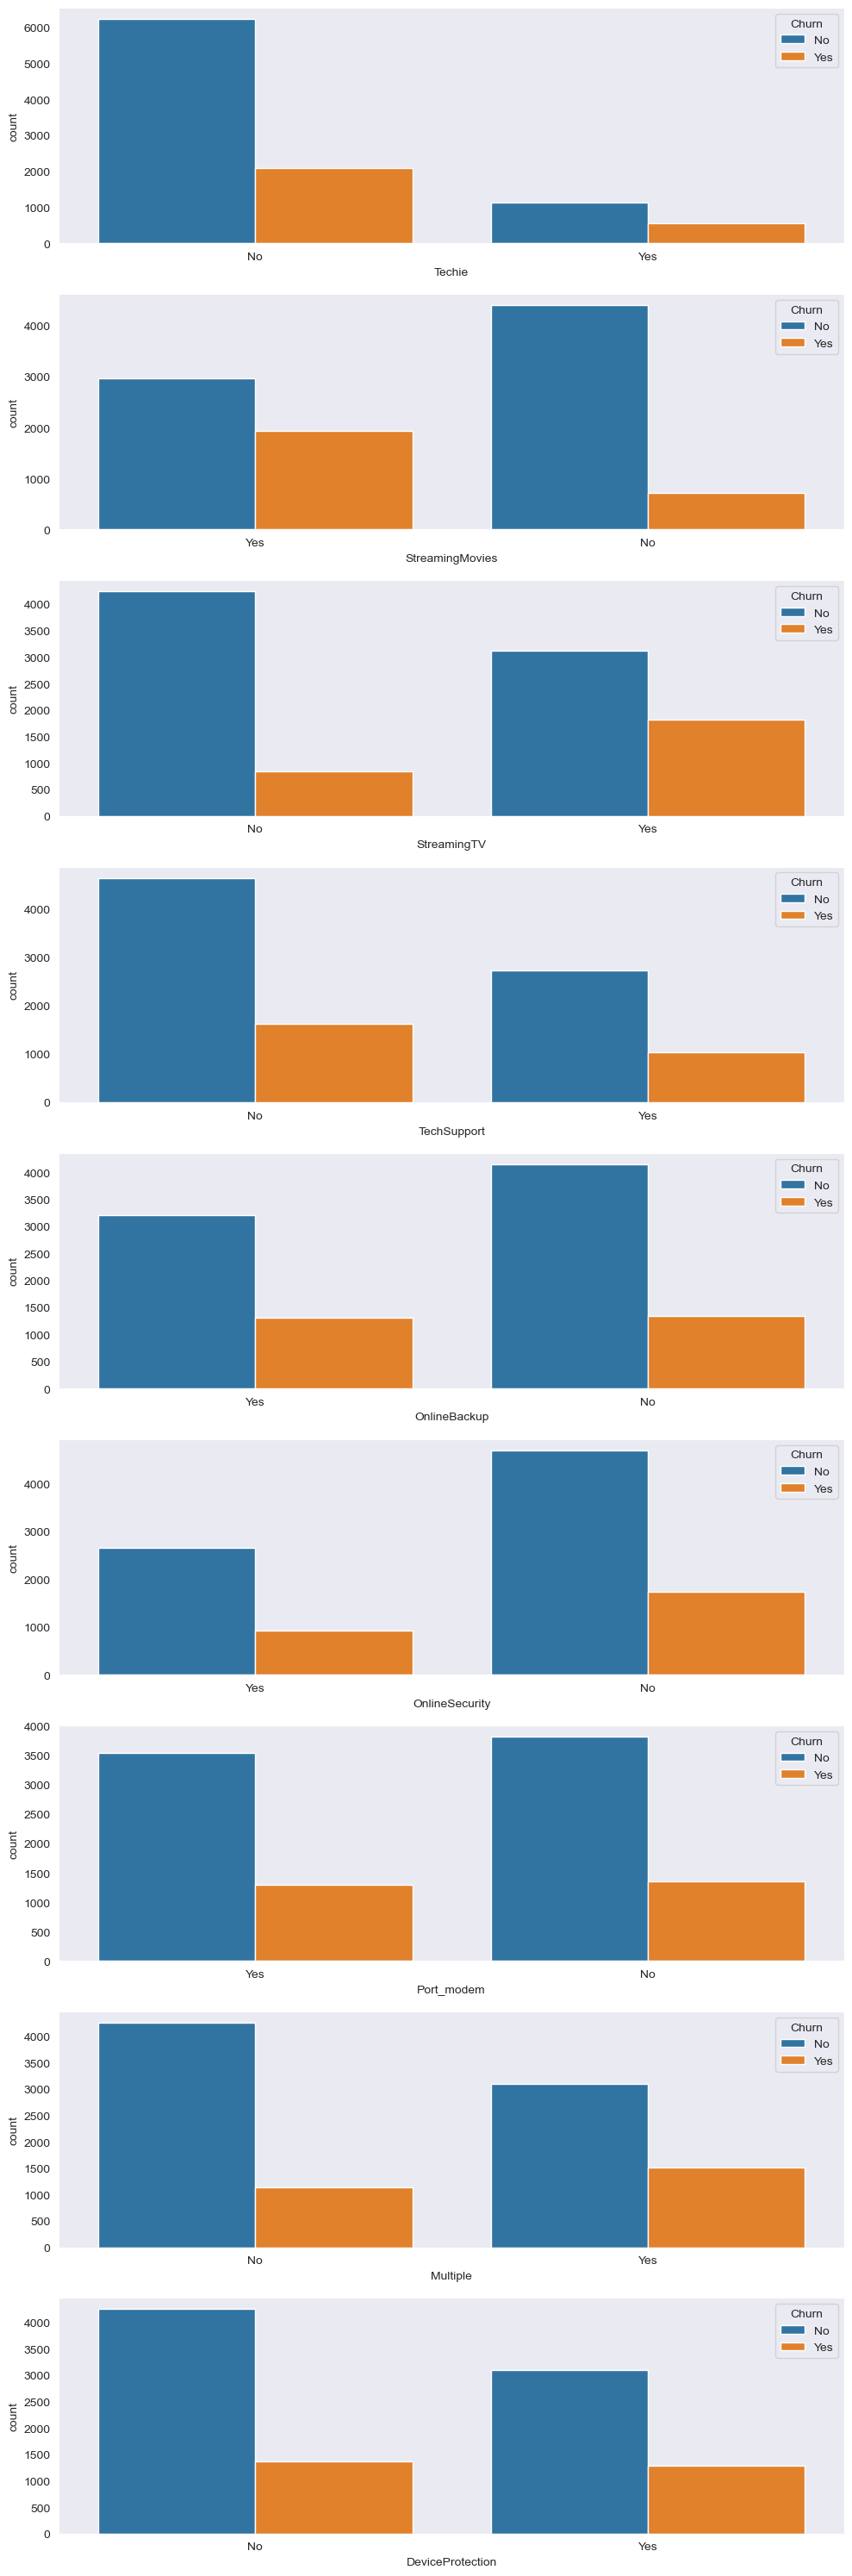

In [25]:
fig , ax = plt.subplots(9,figsize = (10,30))  
for i , subplots in zip (df_categorical, ax.flatten()):  
  sns.countplot(df_categorical[i], ax = subplots, hue= df['Churn'])
plt.tight_layout()
plt.show()

### Data Wrangling - Re-expression of Ordinal Categorial Variables

In [26]:
df[['Techie', 'Churn', 'StreamingMovies', 'StreamingTV', 'TechSupport', 'OnlineBackup', 'OnlineSecurity', 'Port_modem', 'Multiple', 'DeviceProtection']].head(10)

Techie Churn StreamingMovies StreamingTV TechSupport OnlineBackup  \
0     No    No             Yes          No          No          Yes   
1    Yes   Yes             Yes         Yes          No           No   
2    Yes    No             Yes          No          No           No   
3    Yes    No              No         Yes          No           No   
4     No   Yes              No         Yes         Yes           No   
5     No    No             Yes          No          No          Yes   
6    Yes   Yes             Yes         Yes         Yes           No   
7    Yes   Yes              No          No          No          Yes   
8     No    No              No          No          No          Yes   
9     No    No             Yes          No          No           No   

  OnlineSecurity Port_modem Multiple DeviceProtection  
0            Yes        Yes       No               No  
1            Yes         No      Yes               No  
2             No        Yes      Yes               No  
3            Yes         No       No               No  
4             No        Yes       No               No  
5            Yes        Yes      Yes              Yes  
6             No         No       No               No  
7             No         No       No               No  
8            Yes        Yes       No               No  
9            Yes        Yes       No              Yes

In [27]:
for col in categorical:
    df[col] = df[col].astype('category')
    df[col] = df[col].cat.codes

In [28]:
df[['Techie', 'Churn', 'StreamingMovies', 'StreamingTV', 'TechSupport', 'OnlineBackup', 'OnlineSecurity', 'Port_modem', 'Multiple', 'DeviceProtection']].head(10)

Techie  Churn  StreamingMovies  StreamingTV  TechSupport  OnlineBackup  \
0       0      0                1            0            0             1   
1       1      1                1            1            0             0   
2       1      0                1            0            0             0   
3       1      0                0            1            0             0   
4       0      1                0            1            1             0   
5       0      0                1            0            0             1   
6       1      1                1            1            1             0   
7       1      1                0            0            0             1   
8       0      0                0            0            0             1   
9       0      0                1            0            0             0   

   OnlineSecurity  Port_modem  Multiple  DeviceProtection  
0               1           1         0                 0  
1               1           0         1                 0  
2               0           1         1                 0  
3               1           0         0                 0  
4               0           1         0                 0  
5               1           1         1                 1  
6               0           0         0                 0  
7               0           0         0                 0  
8               1           1         0                 0  
9               1           1         0                 1

### Initial Model - Logistic Regression

In [29]:
x = df[['Children', 'Age', 'Income', 'Outage_sec_perweek','Email', 'Contacts', 'Yearly_equip_failure', 'MonthlyCharge', 'Bandwidth_GB_Year', 'Techie', 
        'Tenure', 'StreamingMovies', 'StreamingTV', 'TechSupport', 'OnlineBackup', 'OnlineSecurity', 'Port_modem', 'Multiple', 'DeviceProtection']]

In [30]:
y = df[['Churn']]

In [31]:
def mrm_models():
    model = smf.logit('y~x', data=df).fit()
    print(model.summary())
mrm_models()

Optimization terminated successfully.
         Current function value: 0.304812
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9980
Method:                           MLE   Df Model:                           19
Date:                Mon, 27 Feb 2023   Pseudo R-squ.:                  0.4728
Time:                        10:20:51   Log-Likelihood:                -3048.1
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.3331      0.308    -14.065      0.000      -4.937      -3.729
x[0]          -0.0808      0.

### Confusion Matrix 1

In [32]:
logreg = LogisticRegression()
logreg.fit(x, y)

LogisticRegression()

In [33]:
y_pred = logreg.predict(x)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x, y)))

Accuracy of logistic regression classifier on test set: 0.82


In [34]:
confusion_matrix = confusion_matrix(y, y_pred)
print(confusion_matrix)

[[6459  891]
 [ 875 1775]]


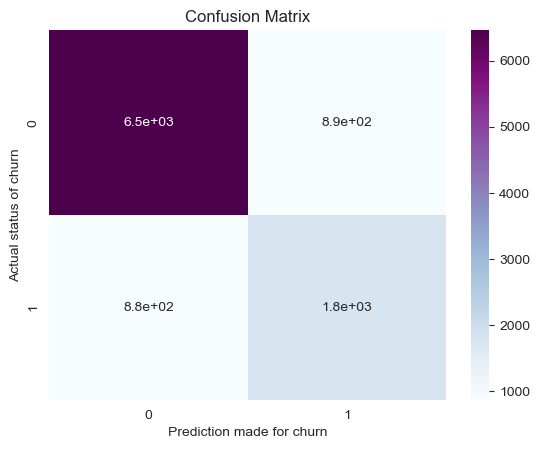

In [35]:
ax = sns.heatmap(confusion_matrix, annot=True, cmap='BuPu')
ax.set_title('Confusion Matrix');
ax.set_xlabel('Prediction made for churn')
ax.set_ylabel('Actual status of churn');
## Ticket labels – List must be in alphabetical order
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])
## Display the visualization of the Confusion Matrix.
plt.show()

In [36]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      7350
           1       0.67      0.67      0.67      2650

    accuracy                           0.82     10000
   macro avg       0.77      0.77      0.77     10000
weighted avg       0.82      0.82      0.82     10000



### Test for Multicollinearity

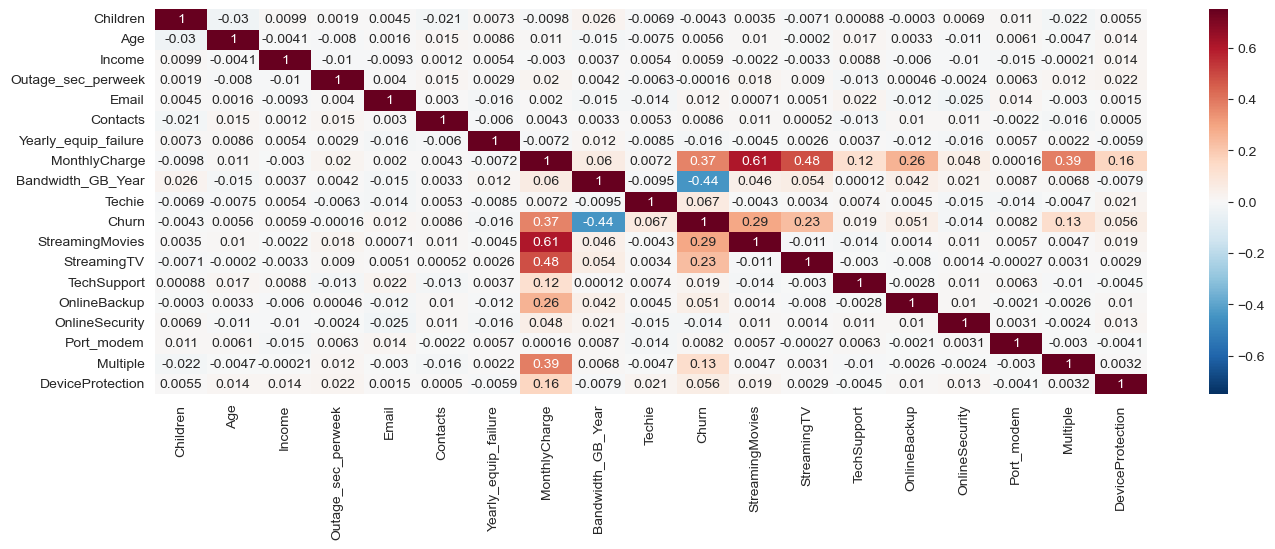

In [37]:
correlation = df[['Children', 'Age', 'Income', 'Outage_sec_perweek','Email', 'Contacts', 'Yearly_equip_failure', 'MonthlyCharge', 'Bandwidth_GB_Year', 'Techie', 'Churn', 
                  'StreamingMovies', 'StreamingTV', 'TechSupport', 'OnlineBackup', 'OnlineSecurity', 'Port_modem', 'Multiple', 'DeviceProtection']].corr()
plt.figure(figsize=(16, 5))
heatmap = sns.heatmap(correlation, annot=True, linewidths=0, vmin=-0.75, vmax=0.75, cmap="RdBu_r")

In [38]:
def vif_scores():
    vif_score = pd.DataFrame() 
    vif_score['Features'] = x.columns
    vif_score['VIF'] = [variance_inflation_factor(x.values, i) 
    for i in range(len(x.columns))] 
    print(vif_score)
vif_scores()

                Features         VIF
0               Children    2.164211
1                    Age    7.441955
2                 Income    2.922445
3     Outage_sec_perweek   10.718760
4                  Email   13.749625
5               Contacts    1.998570
6   Yearly_equip_failure    1.385870
7          MonthlyCharge   75.362898
8      Bandwidth_GB_Year  381.079124
9                 Techie    1.200966
10                Tenure  302.816146
11       StreamingMovies    6.145852
12           StreamingTV    5.097317
13           TechSupport    1.784729
14          OnlineBackup    2.646322
15        OnlineSecurity    1.640155
16            Port_modem    1.919190
17              Multiple    3.393353
18      DeviceProtection    2.105628


In [39]:
x.drop('Bandwidth_GB_Year', axis=1, inplace=True)
vif_scores()

                Features        VIF
0               Children   1.922804
1                    Age   6.981442
2                 Income   2.910174
3     Outage_sec_perweek  10.597767
4                  Email  13.456509
5               Contacts   1.995289
6   Yearly_equip_failure   1.384931
7          MonthlyCharge  75.349552
8                 Techie   1.200385
9                 Tenure   2.652288
10       StreamingMovies   5.539709
11           StreamingTV   4.383087
12           TechSupport   1.779404
13          OnlineBackup   2.521204
14        OnlineSecurity   1.572585
15            Port_modem   1.917904
16              Multiple   3.298422
17      DeviceProtection   2.014209


In [40]:
x.drop('MonthlyCharge', axis=1, inplace=True)
vif_scores()

                Features        VIF
0               Children   1.905471
1                    Age   6.543691
2                 Income   2.855522
3     Outage_sec_perweek   9.452881
4                  Email  11.127668
5               Contacts   1.979250
6   Yearly_equip_failure   1.380604
7                 Techie   1.195617
8                 Tenure   2.612616
9        StreamingMovies   1.928114
10           StreamingTV   1.934762
11           TechSupport   1.586490
12          OnlineBackup   1.789880
13        OnlineSecurity   1.535603
14            Port_modem   1.906295
15              Multiple   1.820258
16      DeviceProtection   1.766208


In [41]:
x.drop('Email', axis=1, inplace=True)
vif_scores()

                Features       VIF
0               Children  1.880305
1                    Age  6.001056
2                 Income  2.794149
3     Outage_sec_perweek  7.948838
4               Contacts  1.959035
5   Yearly_equip_failure  1.377448
6                 Techie  1.193628
7                 Tenure  2.574414
8        StreamingMovies  1.911565
9            StreamingTV  1.912746
10           TechSupport  1.570458
11          OnlineBackup  1.777816
12        OnlineSecurity  1.530414
13            Port_modem  1.883638
14              Multiple  1.802835
15      DeviceProtection  1.755201


### Reduced Model - Feature (Variable) Selection Method - Backward Stepwise Elimination

In [42]:
mrm_models()
x.head(1)

Optimization terminated successfully.
         Current function value: 0.316323
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9983
Method:                           MLE   Df Model:                           16
Date:                Mon, 27 Feb 2023   Pseudo R-squ.:                  0.4529
Time:                        10:23:08   Log-Likelihood:                -3163.2
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.8681      0.183    -15.709      0.000      -3.226      -2.510
x[0]          -0.0068      0.

Children  Age    Income  Outage_sec_perweek  Contacts  \
0         0   68  28561.99            7.978323         0   

   Yearly_equip_failure  Techie    Tenure  StreamingMovies  StreamingTV  \
0                     1       0  6.795513                1            0   

   TechSupport  OnlineBackup  OnlineSecurity  Port_modem  Multiple  \
0            0             1               1           1         0   

   DeviceProtection  
0                 0

In [43]:
x.drop('Outage_sec_perweek',axis=1, inplace=True)
mrm_models()
x.head(1)

Optimization terminated successfully.
         Current function value: 0.316329
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9984
Method:                           MLE   Df Model:                           15
Date:                Mon, 27 Feb 2023   Pseudo R-squ.:                  0.4529
Time:                        10:23:40   Log-Likelihood:                -3163.3
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.9034      0.149    -19.542      0.000      -3.195      -2.612
x[0]          -0.0068      0.

Children  Age    Income  Contacts  Yearly_equip_failure  Techie    Tenure  \
0         0   68  28561.99         0                     1       0  6.795513   

   StreamingMovies  StreamingTV  TechSupport  OnlineBackup  OnlineSecurity  \
0                1            0            0             1               1   

   Port_modem  Multiple  DeviceProtection  
0           1         0                 0

In [44]:
x.drop('Children',axis=1, inplace=True)
mrm_models()
x.head(1)

Optimization terminated successfully.
         Current function value: 0.316339
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9985
Method:                           MLE   Df Model:                           14
Date:                Mon, 27 Feb 2023   Pseudo R-squ.:                  0.4529
Time:                        10:23:45   Log-Likelihood:                -3163.4
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.9181      0.145    -20.113      0.000      -3.202      -2.634
x[0]           0.0021      0.

Age    Income  Contacts  Yearly_equip_failure  Techie    Tenure  \
0   68  28561.99         0                     1       0  6.795513   

   StreamingMovies  StreamingTV  TechSupport  OnlineBackup  OnlineSecurity  \
0                1            0            0             1               1   

   Port_modem  Multiple  DeviceProtection  
0           1         0                 0

In [45]:
x.drop('Yearly_equip_failure',axis=1, inplace=True)
mrm_models()
x.head(1)

Optimization terminated successfully.
         Current function value: 0.316375
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9986
Method:                           MLE   Df Model:                           13
Date:                Mon, 27 Feb 2023   Pseudo R-squ.:                  0.4528
Time:                        10:23:48   Log-Likelihood:                -3163.7
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.9346      0.144    -20.405      0.000      -3.216      -2.653
x[0]           0.0021      0.

Age    Income  Contacts  Techie    Tenure  StreamingMovies  StreamingTV  \
0   68  28561.99         0       0  6.795513                1            0   

   TechSupport  OnlineBackup  OnlineSecurity  Port_modem  Multiple  \
0            0             1               1           1         0   

   DeviceProtection  
0                 0

In [46]:
x.drop('Contacts', axis=1, inplace=True)
mrm_models()
x.head(1)

Optimization terminated successfully.
         Current function value: 0.316414
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9987
Method:                           MLE   Df Model:                           12
Date:                Mon, 27 Feb 2023   Pseudo R-squ.:                  0.4528
Time:                        10:23:54   Log-Likelihood:                -3164.1
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.9070      0.140    -20.720      0.000      -3.182      -2.632
x[0]           0.0021      0.

Age    Income  Techie    Tenure  StreamingMovies  StreamingTV  TechSupport  \
0   68  28561.99       0  6.795513                1            0            0   

   OnlineBackup  OnlineSecurity  Port_modem  Multiple  DeviceProtection  
0             1               1           1         0                 0

In [47]:
x.drop('Income', axis=1, inplace=True)
mrm_models()
x.head(1)

Optimization terminated successfully.
         Current function value: 0.316459
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9988
Method:                           MLE   Df Model:                           11
Date:                Mon, 27 Feb 2023   Pseudo R-squ.:                  0.4527
Time:                        10:23:58   Log-Likelihood:                -3164.6
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.8630      0.132    -21.637      0.000      -3.122      -2.604
x[0]           0.0021      0.

Age  Techie    Tenure  StreamingMovies  StreamingTV  TechSupport  \
0   68       0  6.795513                1            0            0   

   OnlineBackup  OnlineSecurity  Port_modem  Multiple  DeviceProtection  
0             1               1           1         0                 0

In [48]:
x.drop('Age', axis=1, inplace=True)
mrm_models()
x.head(1)

Optimization terminated successfully.
         Current function value: 0.316556
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9989
Method:                           MLE   Df Model:                           10
Date:                Mon, 27 Feb 2023   Pseudo R-squ.:                  0.4525
Time:                        10:24:01   Log-Likelihood:                -3165.6
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.7524      0.105    -26.199      0.000      -2.958      -2.546
x[0]           0.7149      0.

Techie    Tenure  StreamingMovies  StreamingTV  TechSupport  OnlineBackup  \
0       0  6.795513                1            0            0             1   

   OnlineSecurity  Port_modem  Multiple  DeviceProtection  
0               1           1         0                 0

In [49]:
x.drop('Port_modem', axis=1, inplace=True)
mrm_models()
x.head(1)

Optimization terminated successfully.
         Current function value: 0.316698
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9990
Method:                           MLE   Df Model:                            9
Date:                Mon, 27 Feb 2023   Pseudo R-squ.:                  0.4523
Time:                        10:24:05   Log-Likelihood:                -3167.0
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.6994      0.100    -26.995      0.000      -2.895      -2.503
x[0]           0.7119      0.

Techie    Tenure  StreamingMovies  StreamingTV  TechSupport  OnlineBackup  \
0       0  6.795513                1            0            0             1   

   OnlineSecurity  Multiple  DeviceProtection  
0               1         0                 0

### Confusion Matrix 2

In [50]:
logreg = LogisticRegression()
logreg.fit(x, y)

LogisticRegression()

In [51]:
y_pred = logreg.predict(x)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x, y)))

Accuracy of logistic regression classifier on test set: 0.85


In [52]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y, y_pred)
print(confusion_matrix)

[[6751  599]
 [ 899 1751]]


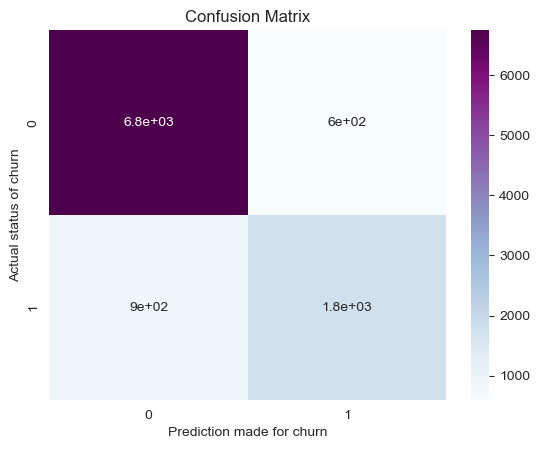

In [53]:
ax = sns.heatmap(confusion_matrix, annot=True, cmap='BuPu')
ax.set_title('Confusion Matrix');
ax.set_xlabel('Prediction made for churn')
ax.set_ylabel('Actual status of churn');
## Ticket labels – List must be in alphabetical order
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])
## Display the visualization of the Confusion Matrix.
plt.show()

In [54]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      7350
           1       0.75      0.66      0.70      2650

    accuracy                           0.85     10000
   macro avg       0.81      0.79      0.80     10000
weighted avg       0.85      0.85      0.85     10000



In [58]:
df.to_csv(r'C:\Users\Marusya\Desktop\Jose_Costa_Churn.csv')